<a href="https://colab.research.google.com/github/prabhat-parth/NN_Computing_Classification/blob/main/NN_classifier_for_HDAC3_ML_59.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
import numpy as np
import pandas as pd
data = pd.read_csv("/content/HDAC3_ML_59.csv")
data.head()
data.shape

(59, 2327)

In [3]:
#Check for Duplicates
print('No of duplicates in DATA: {}'.format(sum(data.duplicated())))

No of duplicates in DATA: 0


In [4]:
#Checking for NaN/null values
print('We have {} NaN/Null values in data'.format(data.isnull().values.sum()))

We have 1 NaN/Null values in data


In [5]:
#Check for Duplicates
print('No of duplicates in DATA: {}'.format(sum(data.duplicated())))

No of duplicates in DATA: 0


In [6]:
#Checking for NaN/null values
print('We have {} NaN/Null values in data'.format(data.isnull().values.sum()))

We have 1 NaN/Null values in data


In [7]:
#Checking for NaN/null values
print('We have {} NaN/Null values in data'.format(data.isnull().values.sum()))
data.shape

We have 1 NaN/Null values in data


(59, 2327)

In [8]:
data

,Name,BA(8/3),nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,nB,nC,nN,nO,nS,nP,nF,nCl,nBr,nI,nX,ATS0m,ATS1m,ATS2m,ATS3m,ATS4m,ATS5m,ATS6m,ATS7m,ATS8m,ATS0v,ATS1v,ATS2v,ATS3v,ATS4v,ATS5v,ATS6v,ATS7v,...,PubchemFP841,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,10,0,0,-8.7700,76.912900,61.9414,76.346618,17,18,66,40,26,0,25,10,5,0,0,0,0,0,0,0,6874.821184,7134.719754,9443.216146,9983.701099,9959.997786,9713.288117,9287.421234,8911.166672,8232.030412,14911.195520,18242.696970,25544.30570,28068.40091,27610.582850,26498.768510,24988.245700,23590.851420,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,26,0,0,-5.4561,29.769027,44.9745,53.063860,11,12,47,27,20,0,17,6,4,0,0,0,0,0,0,0,4673.859635,4816.681972,6252.337343,6340.239594,5927.078931,5087.102483,4768.667469,4615.971512,4285.431402,10146.910370,12441.523510,17152.68401,17976.55953,16920.754890,15279.698280,13585.537480,12515.936520,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,28,0,0,-2.7875,7.770156,45.8026,54.489032,11,11,49,25,24,0,18,4,3,0,0,0,0,0,0,0,4173.827913,4420.890370,5749.784108,5386.712536,4949.787114,4930.077118,4341.375867,3874.445884,3648.215259,9991.743122,12445.978750,17215.62750,17711.98096,16369.996800,15446.427020,14406.484800,12871.755560,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,29,0,0,-2.1274,4.525831,49.6926,56.526239,11,11,51,28,23,0,18,5,5,0,0,0,0,0,0,0,4880.943900,5025.217345,6702.342065,6493.836454,5965.288011,5535.044053,4933.986822,4725.357820,4806.104193,10636.755100,13111.168380,18450.02481,19447.21136,18227.007950,16586.214310,15280.056660,14021.347710,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,30,0,0,-5.2540,27.604516,50.8026,57.122239,11,11,51,28,23,0,18,7,3,0,0,0,0,0,0,0,4761.399996,4969.413457,6426.480212,6229.894729,5833.314507,5647.398562,4914.373110,4605.326104,4562.448516,10690.601900,13138.880860,18192.49958,19199.32450,18146.009300,16963.596620,15490.550770,13972.634220,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,31,1,0,-1.8379,3.377876,74.0959,71.994169,11,11,66,33,33,0,23,5,5,0,0,0,0,0,0,0,5612.425145,5877.626614,8206.345189,7610.769819,7613.743692,7131.845845,6451.301511,6130.218416,5710.928273,13065.177060,16271.597830,22871.11117,24779.95901,23548.465000,22004.180160,21076.356390,20487.223940,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,32,0,0,-8.5679,73.408910,67.7695,80.404997,17,17,70,41,29,0,26,11,4,0,0,0,0,0,0,0,6962.361545,7287.451239,9617.359015,9873.356234,9866.233362,10273.584200,9433.126875,8912.364420,8342.189469,15454.887050,18940.054320,26584.12128,29291.16588,28835.837250,28182.666850,26893.258990,24957.391540,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,33,1,0,-7.9019,62.440024,104.6103,62.849032,0,0,56,32,24,0,19,10,3,0,0,0,0,0,0,0,5495.268328,5686.414841,7276.934833,7266.009615,7344.934808,7518.812764,7103.835694,6686.945331,6120.069756,11875.145060,14484.773110,20129.88442,21901.11115,21684.203460,21010.597010,19762.356980,18127.774680,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,34,1,0,-2.2243,4.947510,41.0950,54.482239,12,12,48,25,23,0,19,3,3,0,0,0,0,0,0,0,4120.879921,4356.851354,5797.508941,6237.042506,5876.037967,5867.650508,5557.170942,4974.014983,4761.804922,10140.862110,12511.444860,17324.51963,19086.89667,1

In [9]:
data = data.drop(['Name'], axis = 1).copy()
data.shape

(59, 2326)

In [10]:
data

,BA(8/3),nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,nB,nC,nN,nO,nS,nP,nF,nCl,nBr,nI,nX,ATS0m,ATS1m,ATS2m,ATS3m,ATS4m,ATS5m,ATS6m,ATS7m,ATS8m,ATS0v,ATS1v,ATS2v,ATS3v,ATS4v,ATS5v,ATS6v,ATS7v,ATS8v,...,PubchemFP841,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,0,0,-8.7700,76.912900,61.9414,76.346618,17,18,66,40,26,0,25,10,5,0,0,0,0,0,0,0,6874.821184,7134.719754,9443.216146,9983.701099,9959.997786,9713.288117,9287.421234,8911.166672,8232.030412,14911.195520,18242.696970,25544.30570,28068.40091,27610.582850,26498.768510,24988.245700,23590.851420,22283.337280,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,-5.4561,29.769027,44.9745,53.063860,11,12,47,27,20,0,17,6,4,0,0,0,0,0,0,0,4673.859635,4816.681972,6252.337343,6340.239594,5927.078931,5087.102483,4768.667469,4615.971512,4285.431402,10146.910370,12441.523510,17152.68401,17976.55953,16920.754890,15279.698280,13585.537480,12515.936520,11837.108780,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,-2.7875,7.770156,45.8026,54.489032,11,11,49,25,24,0,18,4,3,0,0,0,0,0,0,0,4173.827913,4420.890370,5749.784108,5386.712536,4949.787114,4930.077118,4341.375867,3874.445884,3648.215259,9991.743122,12445.978750,17215.62750,17711.98096,16369.996800,15446.427020,14406.484800,12871.755560,11636.365000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,-2.1274,4.525831,49.6926,56.526239,11,11,51,28,23,0,18,5,5,0,0,0,0,0,0,0,4880.943900,5025.217345,6702.342065,6493.836454,5965.288011,5535.044053,4933.986822,4725.357820,4806.104193,10636.755100,13111.168380,18450.02481,19447.21136,18227.007950,16586.214310,15280.056660,14021.347710,13169.169830,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,-5.2540,27.604516,50.8026,57.122239,11,11,51,28,23,0,18,7,3,0,0,0,0,0,0,0,4761.399996,4969.413457,6426.480212,6229.894729,5833.314507,5647.398562,4914.373110,4605.326104,4562.448516,10690.601900,13138.880860,18192.49958,19199.32450,18146.009300,16963.596620,15490.550770,13972.634220,13086.366040,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1,0,-1.8379,3.377876,74.0959,71.994169,11,11,66,33,33,0,23,5,5,0,0,0,0,0,0,0,5612.425145,5877.626614,8206.345189,7610.769819,7613.743692,7131.845845,6451.301511,6130.218416,5710.928273,13065.177060,16271.597830,22871.11117,24779.95901,23548.465000,22004.180160,21076.356390,20487.223940,18845.249220,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,-8.5679,73.408910,67.7695,80.404997,17,17,70,41,29,0,26,11,4,0,0,0,0,0,0,0,6962.361545,7287.451239,9617.359015,9873.356234,9866.233362,10273.584200,9433.126875,8912.364420,8342.189469,15454.887050,18940.054320,26584.12128,29291.16588,28835.837250,28182.666850,26893.258990,24957.391540,23305.564270,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,1,0,-7.9019,62.440024,104.6103,62.849032,0,0,56,32,24,0,19,10,3,0,0,0,0,0,0,0,5495.268328,5686.414841,7276.934833,7266.009615,7344.934808,7518.812764,7103.835694,6686.945331,6120.069756,11875.145060,14484.773110,20129.88442,21901.11115,21684.203460,21010.597010,19762.356980,18127.774680,16264.870490,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,1,0,-2.2243,4.947510,41.0950,54.482239,12,12,48,25,23,0,19,3,3,0,0,0,0,0,0,0,4120.879921,4356.851354,5797.508941,6237.042506,5876.037967,5867.650508,5557.1709

In [11]:
data['BA(8/3)'].value_counts()

0    44
1    15
Name: BA(8/3), dtype: int64

In [12]:
data  = data.astype('float')

In [13]:
gt= data['BA(8/3)'].value_counts().index
gt

Float64Index([0.0, 1.0], dtype='float64')

In [14]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
data['Activity'] = label.fit_transform(data['BA(8/3)'])
data.head()

,BA(8/3),nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,nB,nC,nN,nO,nS,nP,nF,nCl,nBr,nI,nX,ATS0m,ATS1m,ATS2m,ATS3m,ATS4m,ATS5m,ATS6m,ATS7m,ATS8m,ATS0v,ATS1v,ATS2v,ATS3v,ATS4v,ATS5v,ATS6v,ATS7v,ATS8v,...,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,Activity
0,0.0,0.0,-8.7700,76.912900,61.9414,76.346618,17.0,18.0,66.0,40.0,26.0,0.0,25.0,10.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6874.821184,7134.719754,9443.216146,9983.701099,9959.997786,9713.288117,9287.421234,8911.166672,8232.030412,14911.195520,18242.69697,25544.30570,28068.40091,27610.58285,26498.76851,24988.24570,23590.85142,22283.33728,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,-5.4561,29.769027,44.9745,53.063860,11.0,12.0,47.0,27.0,20.0,0.0,17.0,6.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4673.859635,4816.681972,6252.337343,6340.239594,5927.078931,5087.102483,4768.667469,4615.971512,4285.431402,10146.910370,12441.52351,17152.68401,17976.55953,16920.75489,15279.69828,13585.53748,12515.93652,11837.10878,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,-2.7875,7.770156,45.8026,54.489032,11.0,11.0,49.0,25.0,24.0,0.0,18.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4173.827913,4420.890370,5749.784108,5386.712536,4949.787114,4930.077118,4341.375867,3874.445884,3648.215259,9991.743122,12445.97875,17215.62750,17711.98096,16369.99680,15446.42702,14406.48480,12871.75556,11636.36500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,-2.1274,4.525831,49.6926,56.526239,11.0,11.0,51.0,28.0,23.0,0.0,18.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4880.943900,5025.217345,6702.342065,6493.836454,5965.288011,5535.044053,4933.986822,4725.357820,4806.104193,10636.755100,13111.16838,18450.02481,19447.21136,18227.00795,16586.21431,15280.05666,14021.34771,13169.16983,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,-5.2540,27.604516,50.8026,57.122239,11.0,11.0,51.0,28.0,23.0,0.0,18.0,7.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4761.399996,4969.413457,6426.480212,6229.894729,5833.314507,5647.398562,4914.373110,4605.326104,4562.448516,10690.601900,13138.88086,18192.49958,19199.32450,18146.00930,16963.59662,15490.55077,13972.63422,13086.36604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [15]:
df = data.fillna(data.mean())

In [16]:
#library addition
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_validate, cross_val_predict

In [17]:
#determine the number of classes(labels)
label_encoder = LabelEncoder().fit(df.Activity)
labels = label_encoder.transform(df.Activity)
classes = list(label_encoder.classes_)

In [18]:
#split train data into validation and train
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(df, labels, test_size=0.3)

In [19]:
trainX.shape, testX.shape

((41, 2327), (18, 2327))

In [20]:
#wrist_X_train.to_csv('TrainData.csv')
#wrist_X_test.to_csv('TestData.csv')

In [21]:
trainX

,BA(8/3),nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,nB,nC,nN,nO,nS,nP,nF,nCl,nBr,nI,nX,ATS0m,ATS1m,ATS2m,ATS3m,ATS4m,ATS5m,ATS6m,ATS7m,ATS8m,ATS0v,ATS1v,ATS2v,ATS3v,ATS4v,ATS5v,ATS6v,ATS7v,ATS8v,...,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,Activity
8,1.0,0.0,-2.2243,4.947510,41.0950,54.482239,12.0,12.0,48.0,25.0,23.0,0.0,19.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4120.879921,4356.851354,5797.508941,6237.042506,5876.037967,5867.650508,5557.170942,4974.014983,4761.804922,10140.862110,12511.444860,17324.51963,19086.89667,18038.254460,17933.411620,18402.526760,18216.680970,17318.793920,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
7,1.0,0.0,-7.9019,62.440024,104.6103,62.849032,0.0,0.0,56.0,32.0,24.0,0.0,19.0,10.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5495.268328,5686.414841,7276.934833,7266.009615,7344.934808,7518.812764,7103.835694,6686.945331,6120.069756,11875.145060,14484.773110,20129.88442,21901.11115,21684.203460,21010.597010,19762.356980,18127.774680,16264.870490,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
52,1.0,0.0,-2.3276,5.417722,39.1452,53.382239,12.0,12.0,47.0,24.0,23.0,0.0,19.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3924.683872,4356.803310,6008.523103,6731.299686,6531.465984,6699.697825,6549.971911,5825.531970,4372.233637,9897.547932,12595.670500,18601.83313,22162.35120,23116.024460,23816.676420,22626.751100,19108.716120,14211.938920,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
24,0.0,0.0,-3.1635,10.007732,38.3734,46.010274,11.0,12.0,41.0,23.0,18.0,0.0,15.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3990.907167,4115.571392,5525.716383,5490.440257,4884.867661,4160.677002,4066.548005,3708.193315,3338.063617,8751.080727,10822.847250,15021.82221,15458.87816,14032.465770,12309.013960,10992.540540,10089.291320,9269.270727,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,1.0,0.0,-1.8379,3.377876,74.0959,71.994169,11.0,11.0,66.0,33.0,33.0,0.0,23.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5612.425145,5877.626614,8206.345189,7610.769819,7613.743692,7131.845845,6451.301511,6130.218416,5710.928273,13065.177060,16271.597830,22871.11117,24779.95901,23548.465000,22004.180160,21076.356390,20487.223940,18845.249220,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
47,1.0,0.0,-2.4694,6.097936,28.6919,47.726653,12.0,12.0,42.0,21.0,21.0,0.0,17.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3378.155501,3659.732914,4697.326331,4699.574281,4192.054458,4560.282345,4730.028482,4762.880002,4209.916150,8771.955863,10913.704460,15305.45329,16560.24667,15501.989420,16314.119980,17229.780400,16216.750690,13264.020600,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
44,1.0,0.0,-3.0570,9.345249,29.8029,37.593067,6.0,6.0,35.0,16.0,19.0,0.0,12.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2654.802768,2747.972024,3312.448038,3177.739344,2489.951700,2232.944103,2042.095534,1817.380833,1588.690100,6592.203866,8217.865899,11140.33298,

In [22]:
Xtrain = trainX.iloc[:,1:]
Xtrain

,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,nB,nC,nN,nO,nS,nP,nF,nCl,nBr,nI,nX,ATS0m,ATS1m,ATS2m,ATS3m,ATS4m,ATS5m,ATS6m,ATS7m,ATS8m,ATS0v,ATS1v,ATS2v,ATS3v,ATS4v,ATS5v,ATS6v,ATS7v,ATS8v,ATS0e,...,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,Activity
8,0.0,-2.2243,4.947510,41.0950,54.482239,12.0,12.0,48.0,25.0,23.0,0.0,19.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4120.879921,4356.851354,5797.508941,6237.042506,5876.037967,5867.650508,5557.170942,4974.014983,4761.804922,10140.862110,12511.444860,17324.51963,19086.89667,18038.254460,17933.411620,18402.526760,18216.680970,17318.793920,368.454532,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
7,0.0,-7.9019,62.440024,104.6103,62.849032,0.0,0.0,56.0,32.0,24.0,0.0,19.0,10.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5495.268328,5686.414841,7276.934833,7266.009615,7344.934808,7518.812764,7103.835694,6686.945331,6120.069756,11875.145060,14484.773110,20129.88442,21901.11115,21684.203460,21010.597010,19762.356980,18127.774680,16264.870490,446.584448,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
52,0.0,-2.3276,5.417722,39.1452,53.382239,12.0,12.0,47.0,24.0,23.0,0.0,19.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3924.683872,4356.803310,6008.523103,6731.299686,6531.465984,6699.697825,6549.971911,5825.531970,4372.233637,9897.547932,12595.670500,18601.83313,22162.35120,23116.024460,23816.676420,22626.751100,19108.716120,14211.938920,358.252896,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
24,0.0,-3.1635,10.007732,38.3734,46.010274,11.0,12.0,41.0,23.0,18.0,0.0,15.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3990.907167,4115.571392,5525.716383,5490.440257,4884.867661,4160.677002,4066.548005,3708.193315,3338.063617,8751.080727,10822.847250,15021.82221,15458.87816,14032.465770,12309.013960,10992.540540,10089.291320,9269.270727,328.253500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,0.0,-1.8379,3.377876,74.0959,71.994169,11.0,11.0,66.0,33.0,33.0,0.0,23.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5612.425145,5877.626614,8206.345189,7610.769819,7613.743692,7131.845845,6451.301511,6130.218416,5710.928273,13065.177060,16271.597830,22871.11117,24779.95901,23548.465000,22004.180160,21076.356390,20487.223940,18845.249220,512.907940,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
47,0.0,-2.4694,6.097936,28.6919,47.726653,12.0,12.0,42.0,21.0,21.0,0.0,17.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3378.155501,3659.732914,4697.326331,4699.574281,4192.054458,4560.282345,4730.028482,4762.880002,4209.916150,8771.955863,10913.704460,15305.45329,16560.24667,15501.989420,16314.119980,17229.780400,16216.750690,13264.020600,316.383220,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
44,0.0,-3.0570,9.345249,29.8029,37.593067,6.0,6.0,35.0,16.0,19.0,0.0,12.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2654.802768,2747.972024,3312.448038,3177.739344,2489.951700,2232.944103,2042.095534,1817.380833,1588.690100,

In [23]:
Ytrain = trainX.iloc[:,0]
Ytrain

8     1.0
7     1.0
52    1.0
24    0.0
5     1.0
47    1.0
44    1.0
25    0.0
53    1.0
28    0.0
55    1.0
48    0.0
2     0.0
33    0.0
27    0.0
30    0.0
46    0.0
10    0.0
43    0.0
35    0.0
19    0.0
57    1.0
23    0.0
42    0.0
54    1.0
15    0.0
17    0.0
22    0.0
0     0.0
9     0.0
51    1.0
50    1.0
13    0.0
31    0.0
39    0.0
34    0.0
58    1.0
16    0.0
32    0.0
29    0.0
20    0.0
Name: BA(8/3), dtype: float64

In [24]:
Xtest = testX.iloc[:,1:]
Xtest

,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,nB,nC,nN,nO,nS,nP,nF,nCl,nBr,nI,nX,ATS0m,ATS1m,ATS2m,ATS3m,ATS4m,ATS5m,ATS6m,ATS7m,ATS8m,ATS0v,ATS1v,ATS2v,ATS3v,ATS4v,ATS5v,ATS6v,ATS7v,ATS8v,ATS0e,...,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,Activity
14,0.0,-2.7991,7.834961,41.0904,63.295825,17.0,19.0,55.0,30.0,25.0,0.0,22.0,5.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4948.096510,5350.514112,7165.203245,7207.841908,7175.835632,7030.916335,6397.808019,5576.339610,5289.942552,11960.208650,14921.614050,20923.76466,22396.70456,22050.23108,21901.523900,20491.146470,18576.701430,16781.70817,424.916280,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
11,0.0,-2.4094,5.805208,60.3642,72.668204,17.0,18.0,62.0,34.0,28.0,0.0,24.0,5.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,11880.290160,6831.274455,9815.241829,10137.370250,9857.850958,10059.323910,8194.778693,8626.578280,9074.470561,13820.292920,16928.671300,24201.61773,26447.46918,25704.81120,24737.523630,22640.478440,21503.758840,20848.56290,483.866381,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
37,0.0,-2.4094,5.805208,60.3642,72.668204,17.0,18.0,62.0,34.0,28.0,0.0,24.0,5.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,11880.290160,6831.274455,9815.241829,10005.213210,9547.140668,9533.207166,7657.573950,8124.434825,8023.272196,13820.292920,16928.671300,24201.61773,26138.68889,24690.47165,23065.007130,20940.156680,20025.867030,19304.52317,483.866381,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
26,0.0,-8.1004,65.616480,59.0491,68.064618,12.0,12.0,60.0,34.0,26.0,0.0,22.0,8.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5793.668722,5971.103199,7613.739231,7945.173087,7596.951117,7669.296513,7262.680039,6961.263537,6352.342718,12937.625690,15807.427630,21734.17741,24026.95427,23171.85541,22490.506770,21416.584200,19996.743480,18431.56592,475.591368,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,-5.2540,27.604516,50.8026,57.122239,11.0,11.0,51.0,28.0,23.0,0.0,18.0,7.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4761.399996,4969.413457,6426.480212,6229.894729,5833.314507,5647.398562,4914.373110,4605.326104,4562.448516,10690.601900,13138.880860,18192.49958,19199.32450,18146.00930,16963.596620,15490.550770,13972.634220,13086.36604,401.720560,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
21,0.0,-2.0400,4.161600,68.2678,67.935790,11.0,12.0,62.0,32.0,30.0,0.0,22.0,4.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5524.884784,5724.895129,8032.202320,7721.114684,7707.508116,6571.549766,6305.595870,6129.020668,5648.573372,12521.485530,15574.240480,21831.29559,23557.19405,22323.21060,20320.281820,19171.343100,19120.683820,17772.89453,488.362112,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
49,0.0,-2.2138,4.900910,33.1437,36.259481,6.0,6.0,33.0,16.0,17.0,0.0,12.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2652.770640,2889.983957,3880.165086,3956.506877,3071.664931,2623.572937,2241.141899,1846.648665,1433.052823,6

In [25]:
Ytest = testX.iloc[:,0]
Ytest

14    0.0
11    0.0
37    0.0
26    0.0
4     0.0
21    0.0
49    1.0
3     0.0
38    0.0
36    0.0
6     0.0
40    0.0
1     0.0
12    0.0
56    1.0
45    0.0
18    0.0
41    0.0
Name: BA(8/3), dtype: float64

In [26]:
# demonstration of calculating metrics for a neural network model using sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from mlxtend.plotting import plot_confusion_matrix

Accuracy: 94.4444%
Precision: 0.833333
Recall: 0.968750
F1 score: 0.883871
[[15  1]
 [ 0  2]]
              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97        16
         1.0       0.67      1.00      0.80         2

    accuracy                           0.94        18
   macro avg       0.83      0.97      0.88        18
weighted avg       0.96      0.94      0.95        18



(<Figure size 504x504 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f877cc37c10>)

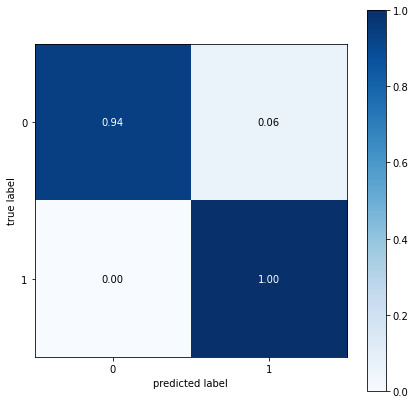

In [27]:
NN = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(25, 25), random_state=1).fit(Xtrain, Ytrain)
imputed_values = NN.predict(Xtest)
acc = accuracy_score(Ytest, imputed_values)
print("Accuracy: {:.4%}".format(acc))
precision = precision_score(Ytest, imputed_values, average='macro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(Ytest, imputed_values, average='macro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(testY, imputed_values, average='macro')
print('F1 score: %f' % f1)
print(confusion_matrix(Ytest, imputed_values))
print(classification_report(Ytest, imputed_values))
plot_confusion_matrix(conf_mat=confusion_matrix(Ytest, imputed_values),colorbar=True,show_absolute=False, show_normed=True, figsize=(7,7))


Accuracy: 88.8889%
Precision: 0.444444
Recall: 0.500000
F1 score: 0.470588
[[16  0]
 [ 2  0]]
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94        16
         1.0       0.00      0.00      0.00         2

    accuracy                           0.89        18
   macro avg       0.44      0.50      0.47        18
weighted avg       0.79      0.89      0.84        18



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resul

(<Figure size 504x504 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f87727490d0>)

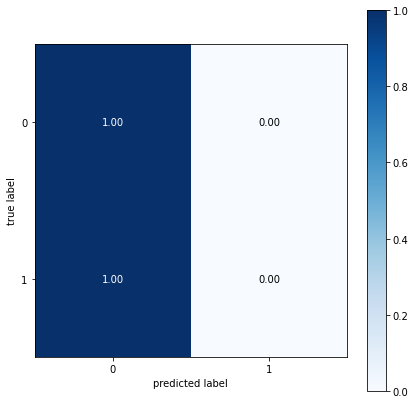

In [28]:
NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(25, 25), random_state=1).fit(Xtrain, Ytrain)
imputed_values = NN.predict(Xtest)
acc = accuracy_score(Ytest, imputed_values)
print("Accuracy: {:.4%}".format(acc))
precision = precision_score(Ytest, imputed_values, average='macro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(Ytest, imputed_values, average='macro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(testY, imputed_values, average='macro')
print('F1 score: %f' % f1)
print(confusion_matrix(Ytest, imputed_values))
print(classification_report(Ytest, imputed_values))
plot_confusion_matrix(conf_mat=confusion_matrix(Ytest, imputed_values),colorbar=True,show_absolute=False, show_normed=True, figsize=(7,7))


Accuracy: 94.4444%
Precision: 0.970588
Recall: 0.750000
F1 score: 0.818182
[[16  0]
 [ 1  1]]
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97        16
         1.0       1.00      0.50      0.67         2

    accuracy                           0.94        18
   macro avg       0.97      0.75      0.82        18
weighted avg       0.95      0.94      0.94        18



(<Figure size 504x504 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f87726e0990>)

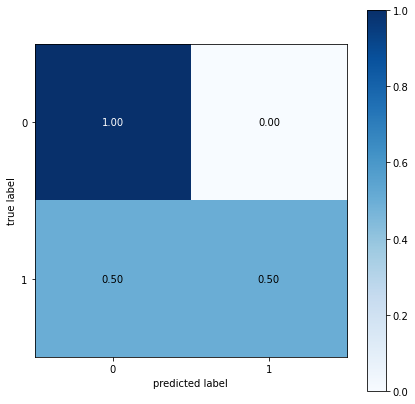

In [29]:
NN = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(25, 25), random_state=1).fit(Xtrain, Ytrain)
imputed_values = NN.predict(Xtest)
acc = accuracy_score(Ytest, imputed_values)
print("Accuracy: {:.4%}".format(acc))
precision = precision_score(Ytest, imputed_values, average='macro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(Ytest, imputed_values, average='macro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(testY, imputed_values, average='macro')
print('F1 score: %f' % f1)
print(confusion_matrix(Ytest, imputed_values))
print(classification_report(Ytest, imputed_values))
plot_confusion_matrix(conf_mat=confusion_matrix(Ytest, imputed_values),colorbar=True,show_absolute=False, show_normed=True, figsize=(7,7))

Accuracy: 94.4444%
Precision: 0.833333
Recall: 0.968750
F1 score: 0.883871
[[15  1]
 [ 0  2]]
              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97        16
         1.0       0.67      1.00      0.80         2

    accuracy                           0.94        18
   macro avg       0.83      0.97      0.88        18
weighted avg       0.96      0.94      0.95        18



(<Figure size 504x504 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8772619f10>)

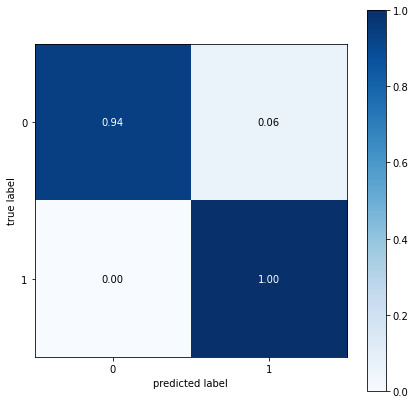

In [30]:
NN = MLPClassifier(solver='adam', activation = 'relu', alpha=1e-5, hidden_layer_sizes=(25, 25), random_state=1).fit(Xtrain, Ytrain)
imputed_values = NN.predict(Xtest)
acc = accuracy_score(Ytest, imputed_values)
print("Accuracy: {:.4%}".format(acc))
precision = precision_score(Ytest, imputed_values, average='macro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(Ytest, imputed_values, average='macro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(testY, imputed_values, average='macro')
print('F1 score: %f' % f1)
print(confusion_matrix(Ytest, imputed_values))
print(classification_report(Ytest, imputed_values))
plot_confusion_matrix(conf_mat=confusion_matrix(Ytest, imputed_values),colorbar=True,show_absolute=False, show_normed=True, figsize=(7,7))


Accuracy: 5.5556%
Precision: 0.029412
Recall: 0.250000
F1 score: 0.052632
[[ 0 16]
 [ 1  1]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        16
         1.0       0.06      0.50      0.11         2

    accuracy                           0.06        18
   macro avg       0.03      0.25      0.05        18
weighted avg       0.01      0.06      0.01        18



(<Figure size 504x504 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8772531290>)

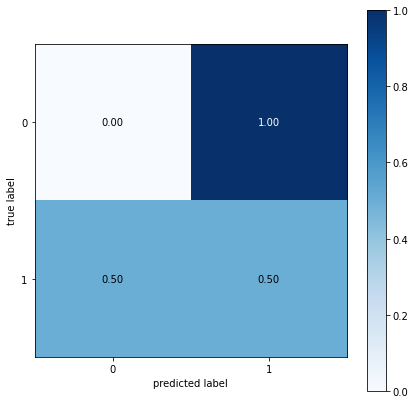

In [31]:
NN = MLPClassifier(solver='adam', activation = 'identity', alpha=1e-5, hidden_layer_sizes=(25, 25), random_state=1).fit(Xtrain, Ytrain)
imputed_values = NN.predict(Xtest)
acc = accuracy_score(Ytest, imputed_values)
print("Accuracy: {:.4%}".format(acc))
precision = precision_score(Ytest, imputed_values, average='macro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(Ytest, imputed_values, average='macro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(testY, imputed_values, average='macro')
print('F1 score: %f' % f1)
print(confusion_matrix(Ytest, imputed_values))
print(classification_report(Ytest, imputed_values))
plot_confusion_matrix(conf_mat=confusion_matrix(Ytest, imputed_values),colorbar=True,show_absolute=False, show_normed=True, figsize=(7,7))


Accuracy: 88.8889%
Precision: 0.444444
Recall: 0.500000
F1 score: 0.470588
[[16  0]
 [ 2  0]]
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94        16
         1.0       0.00      0.00      0.00         2

    accuracy                           0.89        18
   macro avg       0.44      0.50      0.47        18
weighted avg       0.79      0.89      0.84        18



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: 

(<Figure size 504x504 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f87724de1d0>)

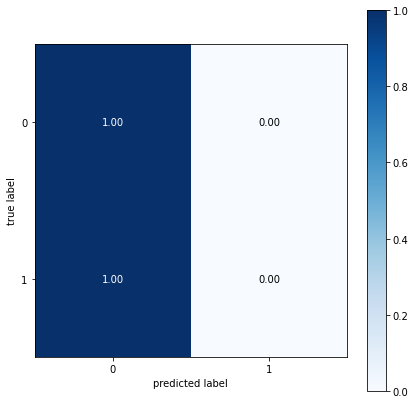

In [32]:
NN = MLPClassifier(solver='adam', activation = 'logistic', alpha=1e-5, hidden_layer_sizes=(25, 25), random_state=1).fit(Xtrain, Ytrain)
imputed_values = NN.predict(Xtest)
acc = accuracy_score(Ytest, imputed_values)
print("Accuracy: {:.4%}".format(acc))
precision = precision_score(Ytest, imputed_values, average='macro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(Ytest, imputed_values, average='macro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(testY, imputed_values, average='macro')
print('F1 score: %f' % f1)
print(confusion_matrix(Ytest, imputed_values))
print(classification_report(Ytest, imputed_values))
plot_confusion_matrix(conf_mat=confusion_matrix(Ytest, imputed_values),colorbar=True,show_absolute=False, show_normed=True, figsize=(7,7))


Accuracy: 88.8889%
Precision: 0.444444
Recall: 0.500000
F1 score: 0.470588
[[16  0]
 [ 2  0]]
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94        16
         1.0       0.00      0.00      0.00         2

    accuracy                           0.89        18
   macro avg       0.44      0.50      0.47        18
weighted avg       0.79      0.89      0.84        18



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: 

(<Figure size 504x504 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f87724cefd0>)

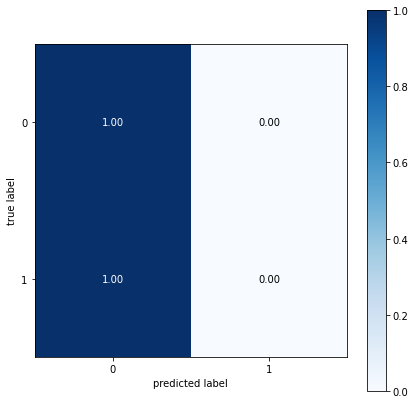

In [33]:
NN = MLPClassifier(solver='adam', activation = 'tanh', alpha=1e-5, hidden_layer_sizes=(25, 25), random_state=1).fit(Xtrain, Ytrain)
imputed_values = NN.predict(Xtest)
acc = accuracy_score(Ytest, imputed_values)
print("Accuracy: {:.4%}".format(acc))
precision = precision_score(Ytest, imputed_values, average='macro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(Ytest, imputed_values, average='macro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(testY, imputed_values, average='macro')
print('F1 score: %f' % f1)
print(confusion_matrix(Ytest, imputed_values))
print(classification_report(Ytest, imputed_values))
plot_confusion_matrix(conf_mat=confusion_matrix(Ytest, imputed_values),colorbar=True,show_absolute=False, show_normed=True, figsize=(7,7))

Accuracy: 94.4444%
Precision: 0.970588
Recall: 0.750000
F1 score: 0.818182
[[16  0]
 [ 1  1]]
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97        16
         1.0       1.00      0.50      0.67         2

    accuracy                           0.94        18
   macro avg       0.97      0.75      0.82        18
weighted avg       0.95      0.94      0.94        18



(<Figure size 504x504 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8772342d10>)

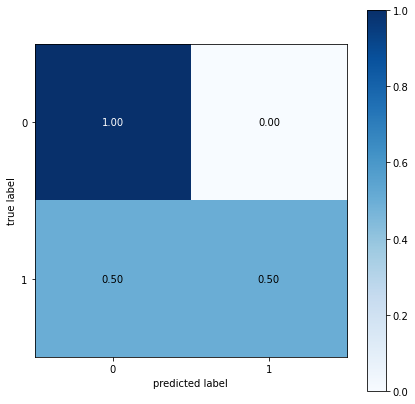

In [34]:
NN = MLPClassifier(solver='sgd', activation = 'relu', learning_rate = 'constant' ,alpha=1e-5, hidden_layer_sizes=(25, 25), random_state=1).fit(Xtrain, Ytrain)
imputed_values = NN.predict(Xtest)
acc = accuracy_score(Ytest, imputed_values)
print("Accuracy: {:.4%}".format(acc))
precision = precision_score(Ytest, imputed_values, average='macro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(Ytest, imputed_values, average='macro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(testY, imputed_values, average='macro')
print('F1 score: %f' % f1)
print(confusion_matrix(Ytest, imputed_values))
print(classification_report(Ytest, imputed_values))
plot_confusion_matrix(conf_mat=confusion_matrix(Ytest, imputed_values),colorbar=True,show_absolute=False, show_normed=True, figsize=(7,7))


Accuracy: 11.1111%
Precision: 0.055556
Recall: 0.500000
F1 score: 0.100000
[[ 0 16]
 [ 0  2]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        16
         1.0       0.11      1.00      0.20         2

    accuracy                           0.11        18
   macro avg       0.06      0.50      0.10        18
weighted avg       0.01      0.11      0.02        18



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: 

(<Figure size 504x504 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f877232c990>)

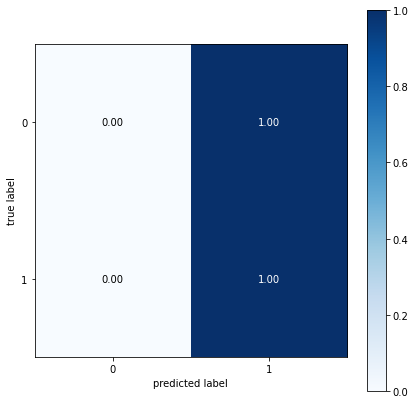

In [35]:
NN = MLPClassifier(solver='sgd', activation = 'relu', learning_rate = 'invscaling' ,alpha=1e-5, hidden_layer_sizes=(25, 25), random_state=1).fit(Xtrain, Ytrain)
imputed_values = NN.predict(Xtest)
acc = accuracy_score(Ytest, imputed_values)
print("Accuracy: {:.4%}".format(acc))
precision = precision_score(Ytest, imputed_values, average='macro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(Ytest, imputed_values, average='macro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(testY, imputed_values, average='macro')
print('F1 score: %f' % f1)
print(confusion_matrix(Ytest, imputed_values))
print(classification_report(Ytest, imputed_values))
plot_confusion_matrix(conf_mat=confusion_matrix(Ytest, imputed_values),colorbar=True,show_absolute=False, show_normed=True, figsize=(7,7))


Accuracy: 94.4444%
Precision: 0.970588
Recall: 0.750000
F1 score: 0.818182
[[16  0]
 [ 1  1]]
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97        16
         1.0       1.00      0.50      0.67         2

    accuracy                           0.94        18
   macro avg       0.97      0.75      0.82        18
weighted avg       0.95      0.94      0.94        18



(<Figure size 504x504 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f87721d7250>)

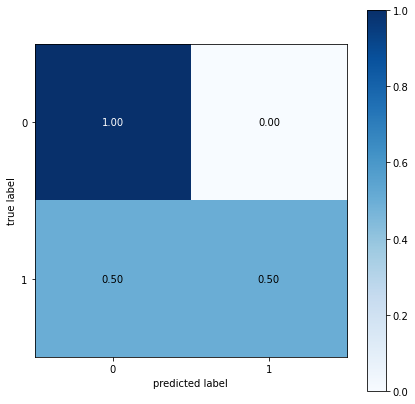

In [36]:
NN = MLPClassifier(solver='sgd', activation = 'relu', learning_rate = 'adaptive' ,alpha=1e-5, hidden_layer_sizes=(25, 25), random_state=1).fit(Xtrain, Ytrain)
imputed_values = NN.predict(Xtest)
acc = accuracy_score(Ytest, imputed_values)
print("Accuracy: {:.4%}".format(acc))
precision = precision_score(Ytest, imputed_values, average='macro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(Ytest, imputed_values, average='macro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(testY, imputed_values, average='macro')
print('F1 score: %f' % f1)
print(confusion_matrix(Ytest, imputed_values))
print(classification_report(Ytest, imputed_values))
plot_confusion_matrix(conf_mat=confusion_matrix(Ytest, imputed_values),colorbar=True,show_absolute=False, show_normed=True, figsize=(7,7))